In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
%matplotlib inline

In [6]:
df = pd.read_csv('data/DataSet_LakasArak.csv')

In [7]:
df

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,...,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,...,yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,...,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,...,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,...,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,...,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78534,Budapest,Budapest VI.,1063.0,flat,brick flat (for sale),to_be_renovated,1,NaN,NaN,south,...,none,2.0,0.0,2016-08-29,65.0,0.0,29.9,10.0,1.0,394169
78535,Budapest,Budapest III.,1031.0,flat,prefabricated panel flat (for sale),missing_info,NaN,NaN,NaN,NaN,...,yes,1.0,0.0,2016-08-29,35.0,0.0,12.9,17.0,1.0,394174
78536,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),good,ground floor,NaN,NaN,NaN,...,none,1.0,0.0,2016-08-29,25.0,0.0,9.0,56.0,1.0,394176
78537,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,NaN,east,...,none,1.0,1.0,2016-08-29,40.0,0.0,17.5,92.0,1.0,394179


In [8]:
def kiertekelo_fuggveny(df, tipp_oszlop_neve, target_oszlop_neve):
    mean_absolute_error=   (abs(df[tipp_oszlop_neve]-df[target_oszlop_neve])).mean()
    
    MAPE=(abs((df[target_oszlop_neve] - df[tipp_oszlop_neve])/df[target_oszlop_neve])).mean()
    rmse =  np.sqrt( ( (df[tipp_oszlop_neve]-df[target_oszlop_neve])**2 ).mean() )
    print("RMSE",rmse)
    print("MAE:",mean_absolute_error)
    print("MAPE:",MAPE)

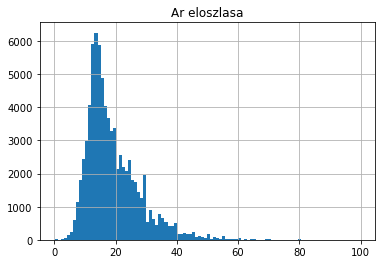

In [9]:
# negyzetmeter ar eloszlasa (100 ezres nagyságrend)
df['price_created_at'].hist(bins=100)
plt.title('Ar eloszlasa')
plt.show()

In [10]:
df.shape

(78539, 22)

In [11]:
def modellezes(df, bemeno_valtozok, celvaltozo):
    train_df=df.iloc[:40000,:].copy()
    test_df =df.iloc[40000:,:].copy()
    
    model=LinearRegression()
    model.fit( train_df[bemeno_valtozok] , train_df[celvaltozo] )
    test_df['tipp']=model.predict( test_df[bemeno_valtozok] )
    return test_df, model

In [12]:
def modellezes(df, bemeno_valtozok, celvaltozo):
    X_train, X_test, y_train, y_test = train_test_split(df[bemeno_valtozok], df[celvaltozo], test_size = 0.5, random_state = 42)    
    model=LinearRegression()
    model.fit(X_train, y_train)
    X_test['tipp']=model.predict(X_test)
    X_test[celvaltozo]=y_test
    
    return X_test, model

# 1. Egyszerű modell

In [13]:
df['small_room_cnt']=df['small_room_cnt'].fillna(0)

In [14]:
bemeno_valtozok = ['room_cnt','small_room_cnt','property_area']
celvaltozo = 'price_created_at'

In [15]:
test_df, model = modellezes(df, bemeno_valtozok, celvaltozo)

In [16]:
kiertekelo_fuggveny(test_df,celvaltozo,'tipp')

RMSE 7.88490065025959
MAE: 5.846925066551253
MAPE: 0.29987407774295294


In [17]:
model.intercept_

3.926488946157715

In [12]:
pd.DataFrame({"att":bemeno_valtozok,"coef":model.coef_}).sort_values('coef')

,att,coef
1,small_room_cnt,-1.209289
0,room_cnt,-0.511056
2,property_area,0.347569


Minél kell jobbnak lenni?

In [13]:
test_df['tipp_0']=df['price_created_at'].mean()

In [14]:
kiertekelo_fuggveny(test_df,'price_created_at','tipp_0')

RMSE 8.8820003850956
MAE: 6.736145146574683
MAPE: 0.3482746361826422


# 2. Adatelőkészítés

Bemenő változóként használjuk a következőket:
* Szobák száma
* Félszobák száma
* Négyzetméter
* Balkon mérete  


Illetve készítsünk dummy változót az alábbi változókból
* Fűtés típusa
* Kerület neve (szóval ne a kerület sorszámát add be bemenetként)
* Lakás állapota

### Hiányzó értékek kezelése

In [15]:
# megnezzuk melyik oszlopoknal mennyi hianyzo ertek van, altalunk hasznaltak kozul csak balcony_areaban van hianyzo ertek
df.isna().sum()

county                         0
city                         559
postcode                   28954
property_type                  0
property_subtype            1659
property_condition_type        0
property_floor              3793
building_floor_count       42110
view_type                  35661
orientation                30892
garden_access              61339
heating_type               11306
elevator_type              14151
room_cnt                       0
small_room_cnt                 0
created_at                     0
property_area                  0
balcony_area                   0
price_created_at               0
ad_view_cnt                    0
active_days                    0
nr                             0
dtype: int64

In [16]:
len(df)

78539

In [17]:
df['balcony_area'].describe()

count    78539.000000
mean         1.953182
std          4.677227
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         97.000000
Name: balcony_area, dtype: float64

In [18]:
# erkely kitoltese 0-aval h nincs erkely
df['balcony_area']=df['balcony_area'].fillna(0)

## Kategorikus változókból dummy

In [19]:
# melyik tipusu lakasbol mennyi van
df['property_subtype'].value_counts()

brick flat (for sale)                  57081
prefabricated panel flat (for sale)    19799
Name: property_subtype, dtype: int64

#### 1. Flag változó (ha két értéket vesz fel)

In [20]:
# Nem igazan elegans ! (flag valtozo) mivel ket erteket vehet fel
df['panel_flag']=df['property_subtype'].apply(lambda x: 1 if str(x)[0]=='p' else 0) 

In [21]:
df['panel_flag'].value_counts()

0    58740
1    19799
Name: panel_flag, dtype: int64

In [22]:
#hianyzo ertekek
df['property_subtype'].isna().sum()

1659

#### 2. Számoknak megfeleltetés

In [23]:
df['city'].value_counts()

Budapest XIII.     8567
Budapest XIV.      8434
Budapest XI.       7001
Budapest VII.      6064
Budapest III.      5646
Budapest VIII.     5460
Budapest VI.       4577
Budapest IX.       3877
Budapest IV.       3376
Budapest II.       3274
Budapest XV.       3109
Budapest X.        3049
Budapest V.        2518
Budapest XII.      2140
Budapest XVIII.    1915
Budapest XXI.      1907
Budapest XIX.      1604
Budapest XX.       1595
Budapest I.        1419
Budapest XVII.      955
Budapest XVI.       769
Budapest XXII.      616
Budapest XXIII.     108
Name: city, dtype: int64

In [24]:
df['postcode'].isna().sum()

28954

In [25]:
df['ker_code']=df['postcode'].fillna(1000).apply(lambda x: int(str(x)[1:3]))

In [26]:
stat = df.groupby('city',as_index=False).agg({'ker_code':'max'})  
stat

,city,ker_code
0,Budapest I.,1
1,Budapest II.,2
2,Budapest III.,3
3,Budapest IV.,4
4,Budapest IX.,9
5,Budapest V.,5
6,Budapest VI.,6
7,Budapest VII.,7
8,Budapest VIII.,8
9,Budapest X.,19


In [27]:
# javitjuk a kerulet hibat kezzel
stat.iloc[9,1]=10
stat.iloc[12,1]=13

In [28]:
stat.columns=['city','kerulet_sorszam']

In [29]:
stat.head()

,city,kerulet_sorszam
0,Budapest I.,1
1,Budapest II.,2
2,Budapest III.,3
3,Budapest IV.,4
4,Budapest IX.,9


In [30]:
df=df.merge(stat,on='city',how='left')

In [31]:
df.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,...,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,panel_flag,ker_code,kerulet_sorszam
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,...,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,0,0,12.0
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,...,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,0,1,1.0
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,...,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,0,16,16.0
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,...,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,0,0,10.0
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,...,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,1,18,18.0


In [32]:
df['kerulet_sorszam'].isnull().sum()

559

In [33]:
df['kerulet_sorszam']=df['kerulet_sorszam'].fillna(0)

#### Dummyzálás

In [34]:
# lessük meg, hogy mi történt (dummy oszlopok)
pd.set_option('display.max_columns', None)

In [35]:
df.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,panel_flag,ker_code,kerulet_sorszam
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,NaN,tile stove (gas),yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,0,0,12.0
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,0,1,1.0
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,NaN,central heating with own meter,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,0,16,16.0
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,NaN,central heating,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,0,0,10.0
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,NaN,NaN,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,1,18,18.0


In [36]:
# fűtés típust vegyük hozzá
df['heating_type'].value_counts()

# Binaris valtozokat hozunk letre a nominalis ertekekbol - Dummy 

df['heating_type']=df['heating_type'].fillna('other')

heating_dummies = pd.get_dummies(df['heating_type'], prefix = 'heating_type=', drop_first = True)

df = df.merge(heating_dummies, left_index = True, right_index = True, how = 'left')

In [37]:
df

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,garden_access,heating_type,elevator_type,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,panel_flag,ker_code,kerulet_sorszam,heating_type=_central heating with own meter,heating_type=_district heating,heating_type=_electric,heating_type=_fan-coil,heating_type=_gas furnace,"heating_type=_gas furnace, circulating hot water",heating_type=_konvection gas burner,heating_type=_other,heating_type=_tile stove (gas)
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,NaN,tile stove (gas),yes,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,0,0,12.0,0,0,0,0,0,0,0,0,1
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,NaN,konvection gas burner,yes,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,0,1,1.0,0,0,0,0,0,0,1,0,0
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,NaN,central heating with own meter,yes,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,0,16,16.0,1,0,0,0,0,0,0,0,0
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,NaN,central heating,none,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,0,0,10.0,0,0,0,0,0,0,0,0,0
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,NaN,other,yes,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,1,18,18.0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78534,Budapest,Budapest VI.,1063.0,flat,brick flat (for sale),to_be_renovated,1,NaN,NaN,south,NaN,"gas furnace, circulating hot water",none,2.0,0.0,2016-08-29,65.0,0.0,29.9,10.0,1.0,394169,0,6,6.0,0,0,0,0,0,1,0,0,0
78535,Budapest,Budapest III.,1031.0,flat,prefabricated panel flat (for sale),missing_info,NaN,NaN,NaN,NaN,NaN,other,yes,1.0,0.0,2016-08-29,35.0,0.0,12.9,17.0,1.0,394174,1,3,3.0,0,0,0,0,0,0,0,1,0
78536,Budapest,Budapest XIV.,NaN,flat,brick flat (for sale),good,ground floor,NaN,NaN,NaN,NaN,konvection gas burner,none,1.0,0.0,2016-08-29,25.0,0.0,9.0,56.0,1.0,394176,0,0,14.0,0,0,0,0,0,0,1,0,0
78537,Budapest,Budapest II.,1024.0,flat,brick flat (for sale),novel,basement,NaN,NaN,east,NaN,"gas furnace, circulating hot water",none,1.0,1.0,2016-08-29,40.0,0.0,17.5,92.0,1.0,394179,0,2,2.0,0,0,0,0,0,1,0,0,0


# 3. Modellezés

In [38]:
bemeno_valtozok=['panel_flag','balcony_area','small_room_cnt','room_cnt','property_area','kerulet_sorszam']

In [39]:
# heating dummy oszlopok hozzáadása
bemeno_valtozok = bemeno_valtozok + heating_dummies.columns.tolist()[:-1]

In [40]:
bemeno_valtozok

['panel_flag',
 'balcony_area',
 'small_room_cnt',
 'room_cnt',
 'property_area',
 'kerulet_sorszam',
 'heating_type=_central heating with own meter',
 'heating_type=_district heating',
 'heating_type=_electric',
 'heating_type=_fan-coil',
 'heating_type=_gas furnace',
 'heating_type=_gas furnace, circulating hot water',
 'heating_type=_konvection gas burner',
 'heating_type=_other']

In [41]:
test_df2, model2 = modellezes(df, bemeno_valtozok, celvaltozo)

In [42]:
kiertekelo_fuggveny(test_df2,celvaltozo,'tipp')

RMSE 6.503505417131904
MAE: 4.657903802490005
MAPE: 0.24529281960624424


In [43]:
#íme a regressziós modellünk paraméterei
pd.DataFrame({"att":bemeno_valtozok,"coef":model2.coef_}).sort_values('coef')

,att,coef
0,panel_flag,-6.453637
12,heating_type=_konvection gas burner,-4.285470
7,heating_type=_district heating,-2.323597
10,heating_type=_gas furnace,-1.946516
8,heating_type=_electric,-1.491047
13,heating_type=_other,-1.476594
5,kerulet_sorszam,-0.427342
2,small_room_cnt,0.201100
1,balcony_area,0.213051
4,property_area,0.290780


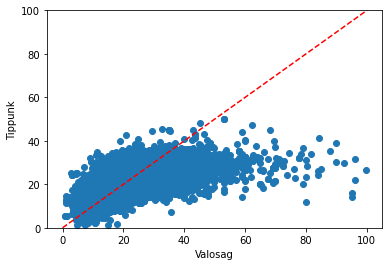

In [44]:
plt.scatter(test_df2[celvaltozo],test_df2['tipp'])
plt.xlabel("Valosag")
plt.ylabel("Tippunk")
plt.ylim(0,100)
plt.plot([0,100],[0,100],'r--')
plt.show()

# Keresztvalidáció

In [45]:
def mean_absolute_percentage_error(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))

In [46]:
# korabban megirt MAPE fg.-t masoljuk
# hiba minel kisebb annal jobb, greater is better = False
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better = False)

In [47]:
model = LinearRegression()

In [48]:
# k-fold = 5 tehat 5 reszre osztja
scores = cross_validate(model, df[bemeno_valtozok], df[celvaltozo], cv = 5, scoring = mape_scorer)

In [49]:
scores

{'fit_time': array([0.04052544, 0.03452873, 0.03417468, 0.03473067, 0.03389645]),
 'score_time': array([0.00377727, 0.03551531, 0.00364804, 0.0036881 , 0.00384307]),
 'test_score': array([-0.38954562, -0.29388451, -0.25917311, -0.22539833, -0.22377278])}

In [50]:
# atlagosan 20 %-os hiba
np.mean(scores['test_score'])

-0.2783548700979639